### <center>Аттестация. Практическое задание в Jupyter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований. Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах:

* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день
То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/solarpower.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [6]:
df.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

In [3]:
for i in range(df.shape[0]):
        if df.iloc[i, 1] == -1.0:
            df.iloc[i, 1] = (df.iloc[i-1, 1] + df.iloc[i+1, 1])/2


In [5]:
print(df.iloc[i])

date         2018-10-26
cum_power       28120.0
Name: 663, dtype: object


In [7]:
print(df["cum_power"].mean())

23848.246987951807


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

После чего создайте данные о ежемесячной выработке энергии на каждый год.

Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['day_power'] = df['cum_power'].diff()

In [9]:
df1=df.groupby(df['date'].dt.to_period('M'))['day_power'].sum()
df1 = df1.reset_index()

In [10]:
print(df1.mean())

day_power    364.045455
dtype: float64


C:\Users\Konstantin\AppData\Local\Temp\ipykernel_14180\1183993460.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df1.mean())


In [11]:
print(df1)

       date  day_power
0   2017-01       97.0
1   2017-02      104.0
2   2017-03      334.0
3   2017-04      489.0
4   2017-05      589.0
5   2017-06      645.0
6   2017-07      562.0
7   2017-08      467.0
8   2017-09      346.0
9   2017-10      199.0
10  2017-11       97.0
11  2017-12       36.0
12  2018-01       64.0
13  2018-02      194.0
14  2018-03      270.0
15  2018-04      439.0
16  2018-05      652.0
17  2018-06      563.0
18  2018-07      682.0
19  2018-08      530.0
20  2018-09      416.0
21  2018-10      234.0


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

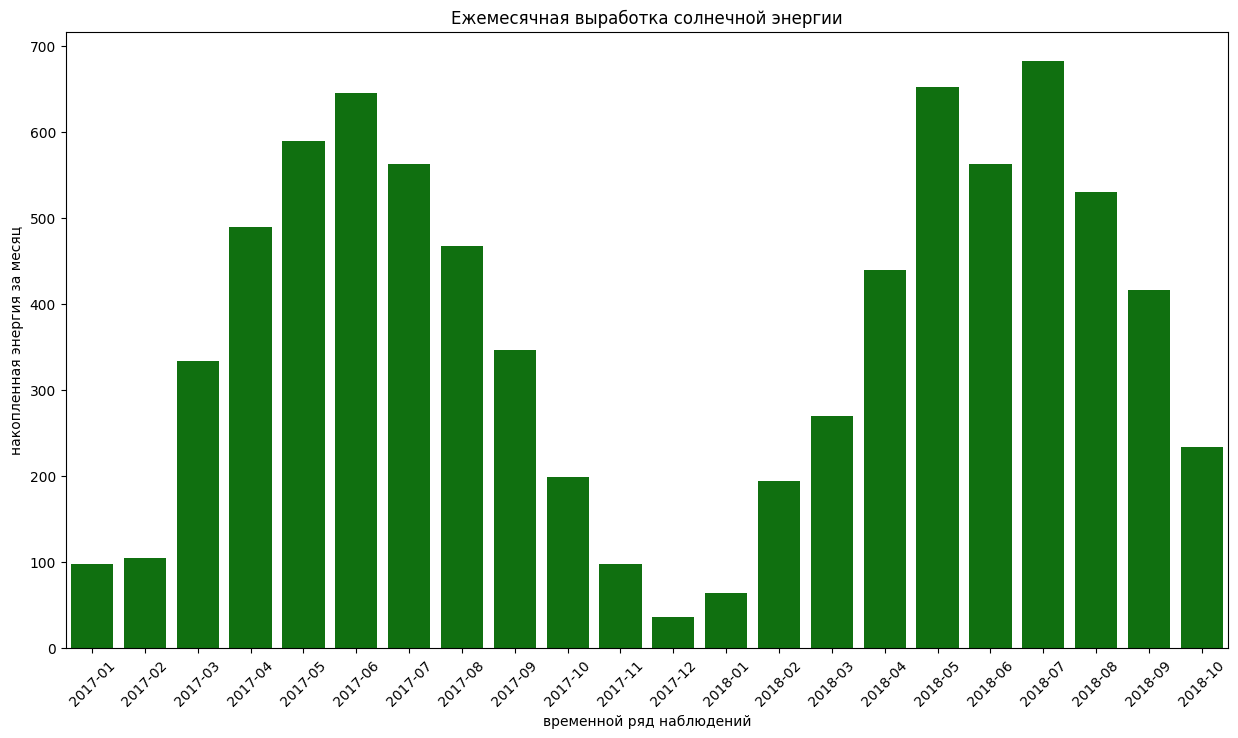

In [13]:
fig = plt.figure(figsize=(15, 8))
plt.xticks(rotation = 45)
sns.barplot(data=df1, x='date', y='day_power', color='green')
plt.title('Ежемесячная выработка солнечной энергии')
plt.xlabel('временной ряд наблюдений') 
plt.ylabel('накопленная энергия за месяц')
plt.show()

**Вывод:**

 **Очевидна зависимость от времени года, летом много солнечных дней, и дни продолжительнее, в этот период наккаливается много энергии. Зимой обратная картина и нехватка солнца отражается не только на людях, но и на энергии солнечных батарей.**